In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage  
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter
from tslearn.clustering import TimeSeriesKMeans
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn import metrics

In [2]:
kmeans_real_labels = np.array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2,
       0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2,
       1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1,
       2, 0])

In [3]:
num_errors = []

In [4]:
series = np.genfromtxt('series_trace_all.csv', delimiter=',')
series

array([[-1.2967 , -1.3337 , -1.3495 , ...,  0.81928,  0.81634,  0.79434],
       [ 0.56421,  0.54512,  0.54205, ...,  0.57133,  0.58619,  0.59086],
       [-2.1008 , -2.0882 , -2.0251 , ...,  0.54294,  0.54375,  0.54387],
       ...,
       [-1.2657 , -1.2381 , -1.2569 , ...,  0.90231,  0.87317,  0.84577],
       [ 0.67424,  0.6995 ,  0.72477, ...,  0.68093,  0.61272,  0.6502 ],
       [ 0.76816,  0.71678,  0.76064, ...,  0.76741,  0.75562,  0.67906]])

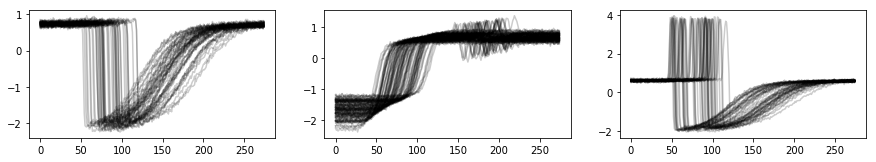

In [5]:
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in series[kmeans_real_labels == yi]:
        plt.plot(xx, "k-", alpha=.2)
plt.show()

In [20]:
dist_matrix = np.genfromtxt('dist_matrix_trace_cdtw75.csv', delimiter=',')
dist_matrix

array([[ 0.        , 21.15279884,  5.1043427 , ...,  1.35633161,
        22.24272784, 18.23127502],
       [21.15279884,  0.        , 23.41287561, ..., 20.76505643,
         0.76032881,  5.9504432 ],
       [ 5.1043427 , 23.41287561,  0.        , ...,  6.32626793,
        23.83097274, 23.37797168],
       ...,
       [ 1.35633161, 20.76505643,  6.32626793, ...,  0.        ,
        21.74655199, 17.91144439],
       [22.24272784,  0.76032881, 23.83097274, ..., 21.74655199,
         0.        ,  5.79756786],
       [18.23127502,  5.9504432 , 23.37797168, ..., 17.91144439,
         5.79756786,  0.        ]])

In [21]:
kmeans_cdtw = KMeans(n_clusters=3, random_state=0).fit(dist_matrix)

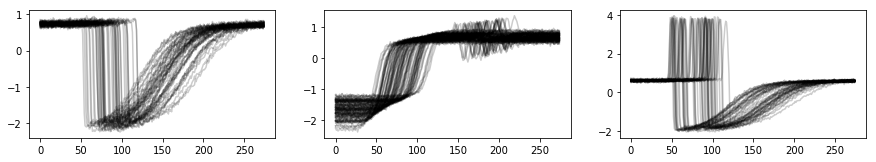

In [32]:
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in series[kmeans_cdtw.labels_ == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
plt.show()

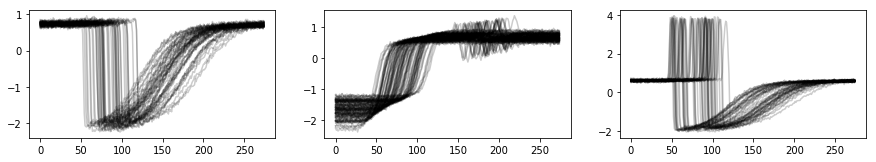

In [23]:
labels_aux = []
new_cl_0 = 0
new_cl_1 = 1
new_cl_2 = 2
for i in range(len(kmeans_real_labels)):
    if(kmeans_real_labels[i]==0):
        labels_aux.append(new_cl_0)
    elif(kmeans_real_labels[i]==1):
        labels_aux.append(new_cl_1)
    else:
        labels_aux.append(new_cl_2)
kmeans_real_labels_aux = np.array(labels_aux)
plt.figure(figsize=(15,8))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in series[kmeans_real_labels_aux == yi]:
        plt.plot(xx, "k-", alpha=.2)
plt.show()

In [24]:
count = 0
for i in range(len(series)):
    if(kmeans_real_labels_aux[i] != kmeans_cdtw.labels_[i]):
        count += 1
error = count/len(series)
print(count)
print(error)

0
0.0


In [25]:
num_errors.append(error)

In [26]:
num_errors

[0.23, 0.0, 0.0]

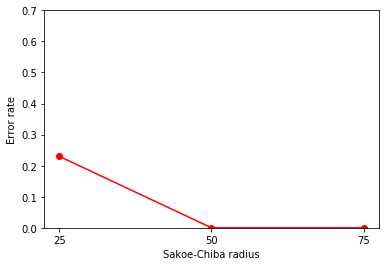

In [27]:
x = [25, 50, 75]
# create an index for each tick position
xi = [i for i in range(0, len(x))]
plt.ylim(0,0.7)
# plot the index for the x-values
plt.plot(xi, num_errors, marker='o', color='r')
plt.xlabel('Sakoe-Chiba radius')
plt.ylabel('Error rate')
plt.xticks(xi, x)
plt.show()